## Insert here your data for testing (CSV format, should be in the same folder of the Notebook):

In [ ]:
test = #filename.csv

## Loading data , run this part

In [6]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('creditcard_train.csv')
x=data.drop(['Class'],axis=1)
y=data.Class


X_train1,X_test,y_train1,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
X_train1['normalizedAmount'] = StandardScaler().fit_transform(X_train1['Amount'].values.reshape(-1,1))
X_train1 = X_train1.drop(['Amount'],axis=1)
X_train1 = X_train1.drop(['Time'],axis=1)
X_test['normalizedAmount'] = StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test = X_test.drop(['Amount'],axis=1)
X_test = X_test.drop(['Time'],axis=1)

## Part 1: all the dataset

In [51]:

from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()

clf.fit(X_train1,y_train1)
y_pred=clf.predict(X_test)


GaussianNB is a function related to solve Naive Bayes problems, in this situation we can't use Multinomial Naive Bayes function because Multinomial is related to discrete values and  we are considering continuous values 

Accuracy: 0.9774784942191458
Precision: 0.06407563025210083
Recall: 0.8970588235294118
Test Data Accuracy: 0.9775


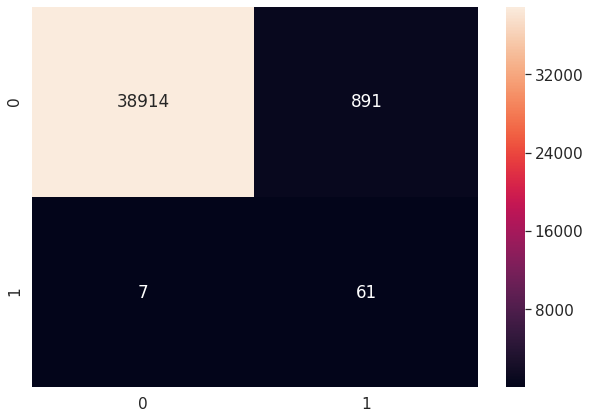

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

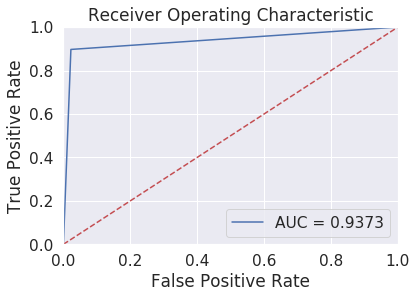

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Part 2: undersample the dataset

In [54]:
from sklearn.naive_bayes import GaussianNB

train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.017))]
fraud = train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train=train.drop(['Class'],axis=1)
y_train=train.Class
clf=GaussianNB()
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_test)
    

Accuracy: 0.975547362877135
Precision: 0.06013579049466537
Recall: 0.9117647058823529
Test Data Accuracy: 0.9755


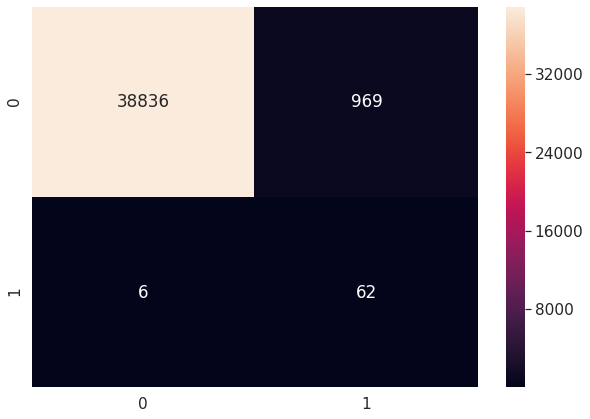

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

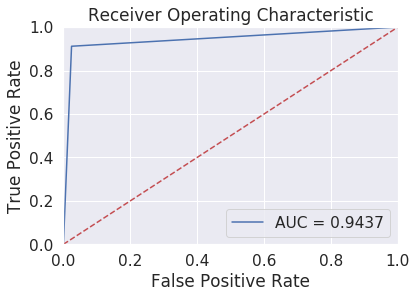

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Part 3: drop irrelevant features

In [57]:
from sklearn.naive_bayes import GaussianNB

train=pd.concat([X_train1,y_train1],axis=1).sample(frac=1)
nofraud_under=train.loc[train.Class==0][:int(np.round((len(train))*0.01))]
fraud = train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)
X_train=train.drop(['Class'],axis=1)
X_train = X_train[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
y_train=train.Class

X_test = X_test[['V14', 'V3','V17', 'V12','V10','V11','V4','V1']]
clf=GaussianNB()
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_test)

Accuracy: 0.9847766659142778
Precision: 0.09473684210526316
Recall: 0.9264705882352942
Test Data Accuracy: 0.9848


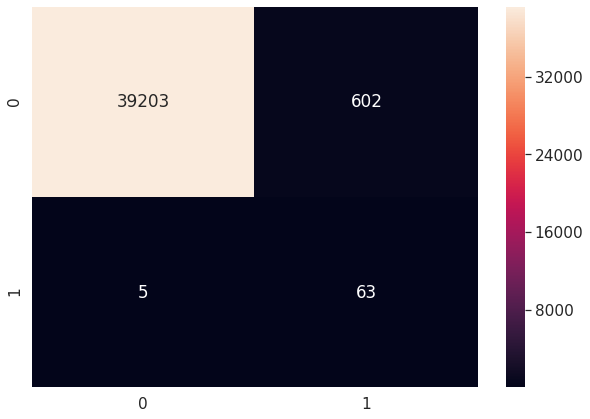

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


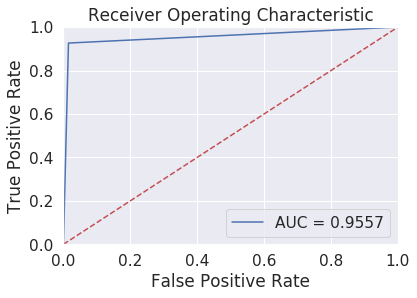

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Final results

In [ ]:
#Use entire dataset for training
train = data.sample(frac=1)
nofraud_under = train.loc[train.Class == 0][:int(np.round((len(train))*0.01))]
fraud= train.loc[train.Class == 1]
train = pd.concat([fraud, nofraud_under]).sample(frac=1)

X_train = train.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_train = train.Class

#Elaborate test data

data_final = pd.read_csv(test)
X_final = data_final.drop(['Class','V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Time'], axis = 1)
y_final = data_final.Class


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train,y_train)
   
y_pred=clf.predict(X_final)
                           

print('Recall:',metrics.recall_score(y_final, y_pred))
print('Precision:',metrics.precision_score(y_final, y_pred))
print('Accuracy:',accuracy_score(y_final,y_pred))
cm = confusion_matrix(y_final, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_final, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_final, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

np.savetxt('NB_predictions.txt',y_pred, fmt = '%i', newline = '\n')